<a href="https://colab.research.google.com/github/dtype2100/DeepLearning/blob/master/220905_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

[History](https://medium.com/@nikasa1889/the-modern-history-of-object-recognition-infographic-aea18517c318)

In [ ]:
!git clone https://github.com/taehojo/deeplearning.git

Cloning into 'deeplearning'...
remote: Enumerating objects: 787, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 787 (delta 4), reused 1 (delta 0), pack-reused 776
Receiving objects: 100% (787/787), 46.72 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (304/304), done.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = '/content/deeplearning/data/model/MNIST_CNN.hdf5'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="/content/deeplearning/data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.07554, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07554 to 0.06149, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.06149 to 0.05182, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05182 to 0.04834, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04834 to 0.04458, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04458 to 0.04227, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04227 to 0.04215, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.04215 to 0.04042, saving model to /content/deeplearning/data/model/MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04042

Epoch 10: val_loss 

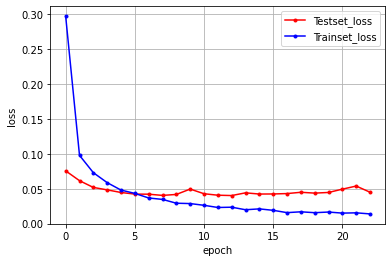

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

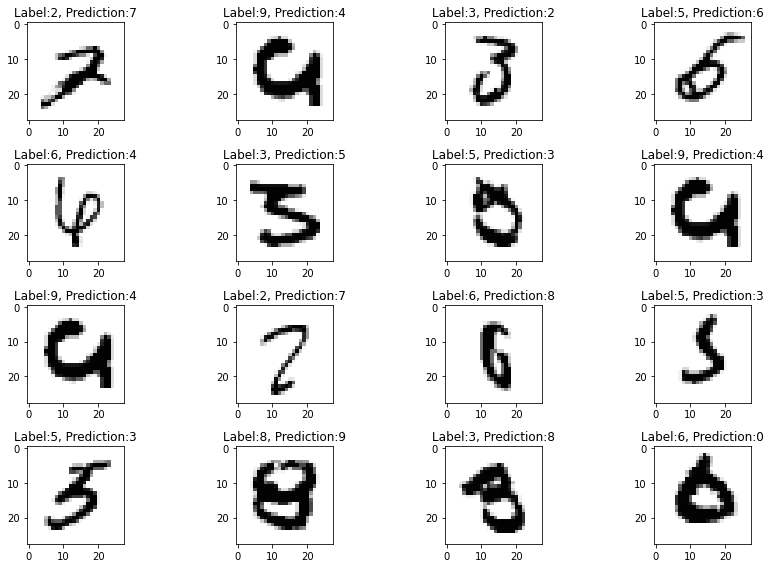

In [ ]:
import random
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()


# 딥러닝을 이용한 자연어 처리
## 텍스트의 토큰화

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array

from tensorflow.keras.preprocessing.text import text_to_word_sequence

text = '해보지 않으면 해날 수 없다'

result = text_to_word_sequence(text)
print('원문: ', text)
print('토큰화: ', result)

원문:  해보지 않으면 해날 수 없다
토큰화:  ['해보지', '않으면', '해날', '수', '없다']


In [ ]:
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',
       ]
 
token = Tokenizer()
token.fit_on_texts(docs)

print('\n단어 카운트: \n', token.word_counts) 
print("\n문장 카운트: \n", token.document_count)
print('\n각 단어가 몇 개의 문장에 포함되어 있는가: \n', token.word_docs)
print('\n각 단어에 매겨진 인덱스 값: \n', token.word_index) 


단어 카운트: 
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트: 
 3

각 단어가 몇 개의 문장에 포함되어 있는가: 
 defaultdict(<class 'int'>, {'나누어': 1, '각': 1, '단어를': 1, '토큰화': 1, '먼저': 1, '텍스트의': 2, '합니다': 1, '인식됩니다': 1, '단어로': 1, '토큰화해야': 1, '딥러닝에서': 2, '수': 1, '사용할': 1, '결과는': 1, '있습니다': 1, '토큰화한': 1})

각 단어에 매겨진 인덱스 값: 
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


In [ ]:
text="오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"
token = Tokenizer()
token.fit_on_texts([text])
print(token.word_index)

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


In [ ]:
x = token.texts_to_sequences([text]) # 인덱스만 출력
print(x)

[[1, 2, 3, 4, 5, 6]]


## 단어의 원-핫인코딩

In [ ]:
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size) # to_categorical 사용하여 원핫인코딩
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


## 텍스트를 읽고 긍정, 부정 예측하기

[Word2Vec](https://wikidocs.net/22660)

In [ ]:
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요",
        "추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요",
        "별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

classes = array([1,1,1,1,1,0,0,0,0,0])

token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [ ]:
x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n",  x)


리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [ ]:
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)


패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [ ]:
word_size = len(token.word_index) + 1

model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              168       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6969 - accuracy: 0.3000
Epoch 2/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6949 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6868 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6848 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6828 - accuracy: 0.7000
Epoch 9/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6807 - accuracy: 0.9000
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6787 - accuracy: 0.9000
Epoch 11/20
1/1 [=================

# LSTM을 이용한 로이터 뉴스 카테고리 분류하기
* [LSTM 참고 링크](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2121728/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 12s 12ms/step - loss: 2.1045 - accuracy: 0.4586 - val_loss: 1.8209 - val_accuracy: 0.5209
Epoch 2/200
450/450 [==============================] - 4s 9ms/step - loss: 1.7285 - accuracy: 0.5524 - val_loss: 1.6265 - val_accuracy: 0.5913
Epoch 3/200
450/450 [==============================] - 4s 8ms/step - loss: 1.6087 - accuracy: 0.5942 - val_loss: 1.5851 - val_accuracy: 0.6113
Epoch 4/200
450/450 [==============================] - 4s 9ms/step - loss: 1.4462 - accuracy: 0.6364 - val_loss: 1.4318 - val_accuracy: 0.6478
Epoch 5/200
450/450 [==============================] - 4s 9ms/step - loss: 1.2911 - accuracy: 0.6743 - val_loss: 1.3529 - val_accuracy: 0.6500
Epoch 6/200
450/450 [==============================] - 4s 10ms/step - loss: 1.1691 - accuracy: 0.7047 - val_loss: 1.2709 - val_accuracy: 0.6812
Epoch 7/200
450/450 [==============================] - 4s 8ms/step - loss: 1.0604 - accuracy: 0.7355 - val_loss: 1.1963 - val_accuracy: 0.7

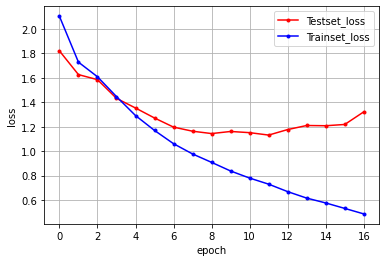

In [ ]:
# 학습셋과 테스트셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#  LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17473536/17464789 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 

In [ ]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 17s 13ms/step - loss: 0.4129 - accuracy: 0.7943 - val_loss: 0.3017 - val_accuracy: 0.8701
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.2356 - accuracy: 0.9087 - val_loss: 0.2725 - val_accuracy: 0.8846
Epoch 3/100
469/469 [==============================] - 5s 12ms/step - loss: 0.1821 - accuracy: 0.9328 - val_loss: 0.2675 - val_accuracy: 0.8912
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1465 - accuracy: 0.9462 - val_loss: 0.2906 - val_accuracy: 0.8901
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1219 - accuracy: 0.9572 - val_loss: 0.3098 - val_accuracy: 0.8878
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 0.3730 - accuracy: 0.8748

 Test Accuracy: 0.8748


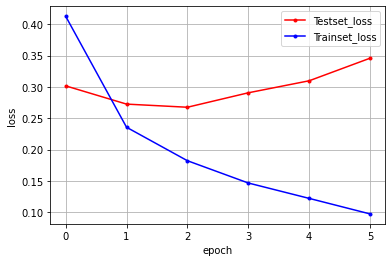

In [ ]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 어텐션을 사용한 신경망

In [ ]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 [==============================] - 28s 40ms/step - loss: 0.3881 - accuracy: 0.8223 - val_loss: 0.2916 - val_accuracy: 0.8782
Epoch 2/100
625/625 [==============================] - 21s 34ms/step - loss: 0.2257 - accuracy: 0.9098 - val_loss: 0.2770 - val_accuracy: 0.8836
Epoch 3/100
625/625 [==============================] - 24s 39ms/step - loss: 0.1644 - accuracy: 0.9369 - val_loss: 0.2916 - val_accuracy: 0.8864
Epoch 4/100
625/625 [==============================] - 21s 34ms/step - loss: 0.1191 - accuracy: 0.9539 - val_loss: 0.3708 - val_accuracy: 0.8697
Epoch 5/100
782/782 [==============================] - 9s 11ms/step - loss: 0.3725 - accuracy: 0.8805

 Test Accuracy: 0.8805


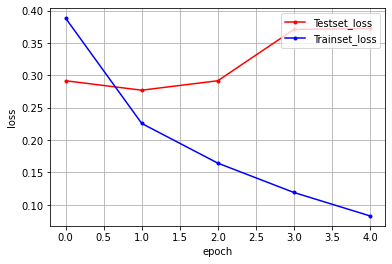

In [ ]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# GAN

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 28, 28, 1)         865281    
                                                                 
 sequential_3 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________
epoch:0  d_loss:0.6947  g_loss:0.3781
epoch:1  d_loss:0.5073  g_loss:0.1141
epoch:2  d_loss:0.4860  g_loss:0.0575
epoch:3  d_loss:0.4691  g_loss:0.0655
epoch:4  d_loss:0.4537  g_loss:0.1100
epoch:5  d_loss:0.4385  g_loss:0.2312
epoch:6  d_loss:0.4491  g_loss:0.3159
epoch:7  d_loss:0.4451  g_loss:0.3276
epoch

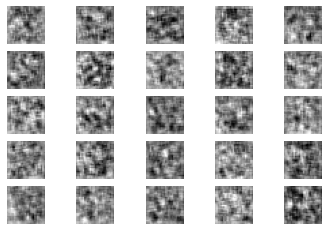

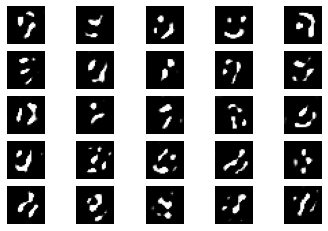

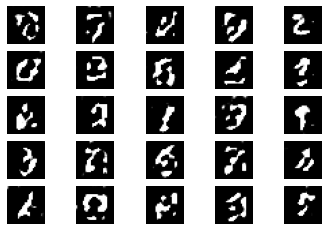

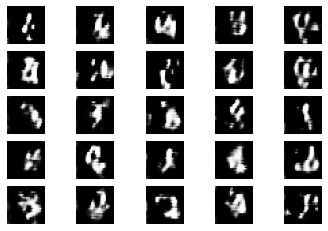

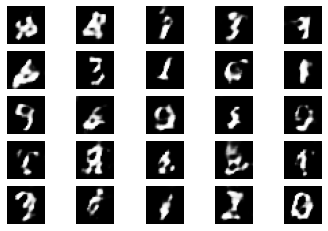

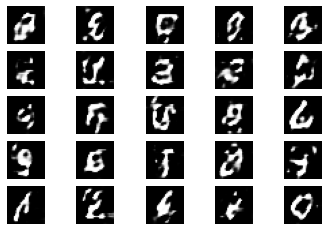

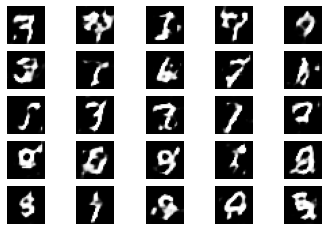

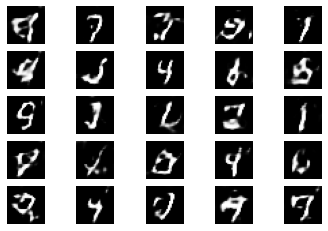

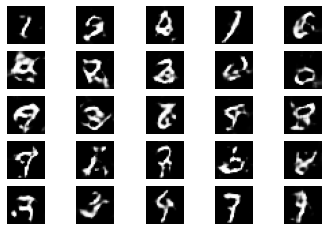

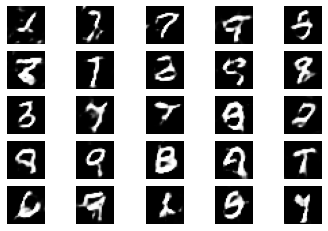

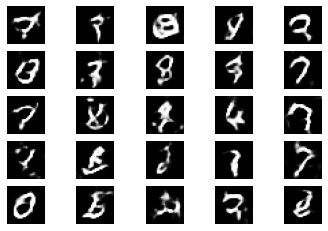

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 예제 파일에서 data 폴더 아래에 이미지가 저장될 gan_images 폴더가 함께 제공됩니다.
# 만약 이미지가 저장될 폴더가 없다면 아래 코드의 주석을 해제해 gan_images 폴더를 만듭니다.
# import os
# if not os.path.exists("./data/gan_images"):
#    os.makedirs("./data/gan_images")

# 생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

# 생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

# 신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터를 불러옵니다.

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트 과정은 필요 없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀 값은 0에서 255 사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1 사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          # 가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # 판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이 부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스 코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("/content/deeplearning/data/gan_images/gan_mnist_%d.png" % i)

gan_train(2001, 32, 200)  # 2000번 반복되고, 배치 사이즈는 32,  200번마다 결과가 저장되게 하였습니다.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 8)          

Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 0.2135 - val_loss: 0.1380
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1267 - val_loss: 0.1177
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1140 - val_loss: 0.1090
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1072 - val_loss: 0.1036
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1027 - val_loss: 0.0997
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0995 - val_loss: 0.0969
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0971 - val_loss: 0.0950
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0952 - val_loss: 0.0933
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0936 - val_loss: 0.0917
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0923 - val_loss: 0.0911

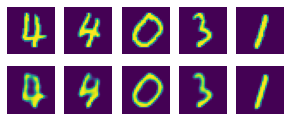

In [ ]:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트할 이미지를 랜덤하게 불러오기.
ae_imgs = autoencoder.predict(X_test)                     # 앞서 만든 오토인코더 모델에 삽입

plt.figure(figsize=(7, 2))                         # 출력될 이미지의 크기를 정

for i, image_idx in enumerate(random_test):       # 랜덤하게 뽑은 이미지를 차례로 나열
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))   # 테스트할 이미지를 먼저 그대로 보여
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28)) # 오토인코딩 결과를 다음열에 출력
   ax.axis('off')
plt.show()